In [122]:
#imports
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
%config IPCompleter.greedy=True

In [124]:
#dataset
PATH_1 = ("DatasetsImmo/immozip_oneHot.csv")
PATH_2 = ("DatasetsImmo/RA_immoZip.csv")

In [125]:
immo_classic = pd.read_csv(PATH_2)
immo_classic.drop("Unnamed: 0",inplace= True,axis=1)
print("immo_classic ={}".format(immo_classic.shape))

immo_classic =(11865, 22)


In [126]:
immo_one_hot = pd.read_csv(PATH_1)
immo_one_hot.drop("Unnamed: 0",inplace= True,axis=1)
print("immo_one_hot.shape ={}".format(immo_one_hot.shape))
#print(df.info())
immo_one_hot.head(3)

immo_one_hot.shape =(11865, 62)


,price,constructionYear,room_number,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,zip,...,condition_is_to be done up,condition_is_to renovate,condition_is_to restore,heatingType_is_carbon,heatingType_is_electric,heatingType_is_fueloil,heatingType_is_gas,heatingType_is_pellet,heatingType_is_solar,heatingType_is_wood
0,1550000,2017.0,3.0,213,7277.00,1.0,False,False,False,1050,...,0,0,0,0,0,0,1,0,0,0
1,495000,1960.0,3.0,120,4125.00,0.0,False,True,False,1050,...,0,0,0,0,0,0,1,0,0,0
2,1537000,2015.0,2.0,160,9606.25,1.0,False,True,False,1050,...,0,0,0,0,0,0,1,0,0,0


## Question to answer 

- Which variable is the target ?
- How many rows and columns ?
- What is the correlation between the variables and the target ? (Why might that be?)
- What is the correlation between the variables and the other variables ? (Why?)
- Which variables have the greatest influence on the target ?
- Which variables have the least influence on the target ?
- How many qualitative and quantitative variables are there ? How would you transform these values into numerical values ?
- Percentage of missing values per column ?

---------------------------------------------------------

The target variable is __"price"__

The dataframe with the qualitative values converted to binaries contains __11865rows__ and __64columns__

The dataframe without the qualitative values converted to binaries contains __11865rows__ and __23columns__

---------------------------------------------------------

#### Checking correlation

>Between price and the others

In [127]:
corr_matrix = immo_one_hot.drop(["id","zip"],axis=1).corr()

In [128]:
corr_matrix_classic = immo_classic.drop(["id","zip"],axis=1).corr()

> between the variables and the target ? (Why might that be?)

In [129]:
corr_matrix["price"].sort_values(ascending=False)[1:11]

mètres carrés                      0.559393
room_number                        0.427545
hasSwimmingPool                    0.316435
cuisine_type_is_hyper equipped     0.245090
subtype_is_exceptional property    0.245022
subtype_is_villa                   0.212008
lat                                0.205192
parking extérieur                  0.161731
basementExists                     0.153669
condition_is_as new                0.138350
Name: price, dtype: float64

> These are the first 10 variables who influence the price in the dataframe with qualitatives values converted to binaries

In [130]:
corr_matrix_classic["price"].sort_values(ascending=False)[1:11]

mètres carrés         0.559393
room_number           0.427545
hasSwimmingPool       0.316435
lat                   0.205192
parking extérieur     0.161731
basementExists        0.153669
prix mètres carrés    0.136365
parking intérieur     0.057682
atticExists           0.051706
constructionYear     -0.021063
Name: price, dtype: float64

> These are the first 10 variables who influence the price in the dataframe without qualitatives values converted to binaries

### We note that the first three are the same but the conversion into binaries give us more detail on the correlation between some specificities in the goods and their prices

In [131]:
attributes= ["price","mètres carrés","room_number","prix mètres carrés"]

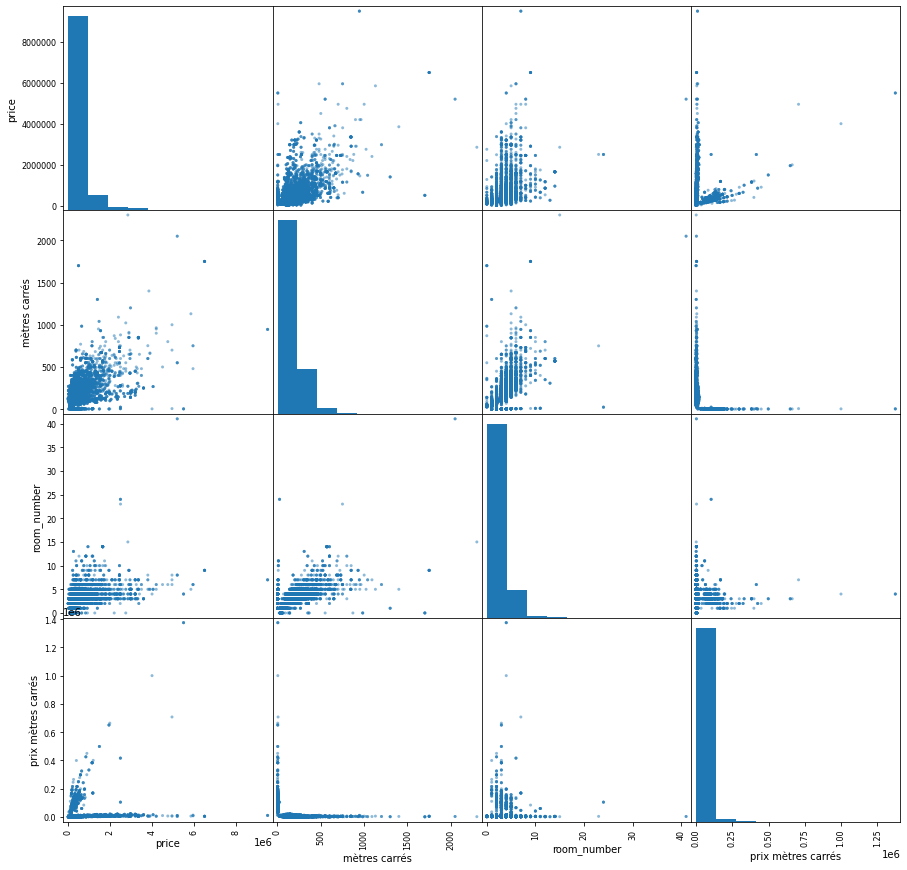

In [132]:
scatter_matrix(immo_one_hot[attributes],figsize=(15,15))
plt.savefig("plots/matrix1.jpg",dpi=200)
plt.show()

We see that there are some outliers

In [133]:
mean_price_mun = immo_classic.sort_values(by="price").groupby("subtype").price.max()

---------------------------------

In [134]:
mean_price_mun = immo_classic.sort_values(by="price").groupby("municipalities").price.mean() #municialities

In [135]:
mean_price_mun.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

municipalities
Luxembourg                 273051.904514
Hainaut                    279100.974513
Liege                      294888.535441
Limburg                    315311.100147
Namur                      331098.043478
East Flanders              369181.161004
Antwerp                    446953.247788
Flemish Brabant            475694.086420
West Flanders              671794.524220
Walloon Brabant            710033.006012
Brussels Capital Region    772830.844644
Name: price, dtype: float64

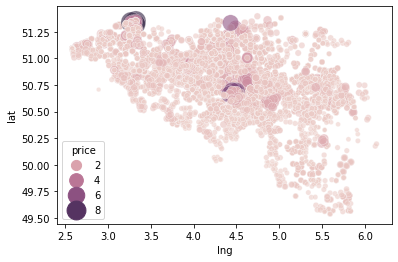

In [136]:
sns.scatterplot(data=immo_one_hot,x="lng",y="lat",size="price",sizes=(20,420),hue="price",alpha=0.6,legend="brief")
plt.savefig("plots/pricesplot1.jpg",dpi=200)
plt.show()

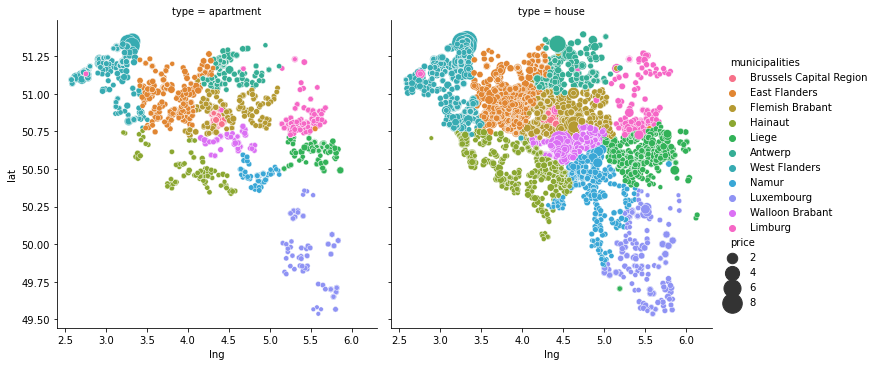

In [137]:
sns.relplot(
    data=immo_classic, x="lng", y="lat",
    col="type", hue="municipalities",size="price",
    sizes=(20,450),kind="scatter"
)
plt.savefig("plots/relplot_type.jpg",dpi=200)
plt.show()

In [138]:
m2_price_mean = immo_classic.sort_values(by="prix mètres carrés").groupby("municipalities")["prix mètres carrés"].mean() #municialities

In [139]:
m2_price_mean.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

municipalities
Liege                       2843.058621
Walloon Brabant             3992.524900
Luxembourg                  6127.015868
Brussels Capital Region     6710.310850
Hainaut                     6973.389040
Flemish Brabant             7032.354435
Namur                       8026.759365
Limburg                     8125.945228
Antwerp                    12169.446681
East Flanders              16750.479530
West Flanders              21923.108908
Name: prix mètres carrés, dtype: float64

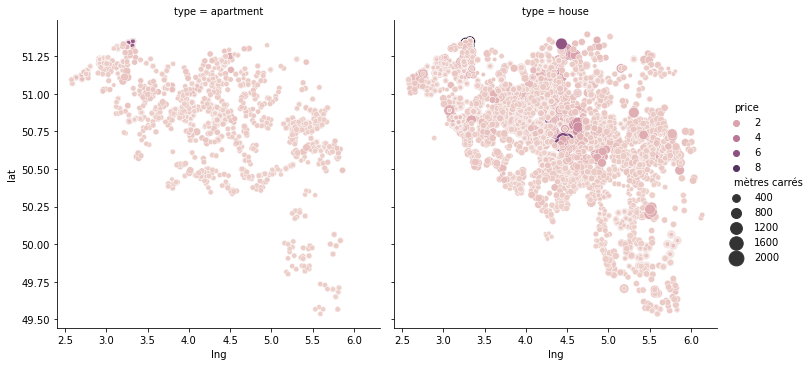

In [140]:
sns.relplot(
    data=immo_classic, x="lng", y="lat",
    col="type", hue="price",size="mètres carrés",
    sizes=(20,250),kind="scatter"
)
plt.savefig("plots/relplot_m2.jpg",dpi=200)
plt.show()

In [141]:
immo_one_hot.columns

Index(['price', 'constructionYear', 'room_number', 'mètres carrés',
       'prix mètres carrés', 'parking extérieur', 'atticExists',
       'basementExists', 'hasSwimmingPool', 'zip', 'city', 'municipalities',
       'parking intérieur', 'lng', 'lat', 'id', 'company_name',
       'type_is_apartment', 'type_is_house', 'subtype_is_apartment',
       'subtype_is_apartment block', 'subtype_is_bungalow',
       'subtype_is_castle', 'subtype_is_chalet', 'subtype_is_country cottage',
       'subtype_is_duplex', 'subtype_is_exceptional property',
       'subtype_is_farmhouse', 'subtype_is_flat studio',
       'subtype_is_ground floor', 'subtype_is_house', 'subtype_is_loft',
       'subtype_is_manor house', 'subtype_is_mansion',
       'subtype_is_mixed use building', 'subtype_is_other property',
       'subtype_is_penthouse', 'subtype_is_service flat',
       'subtype_is_town house', 'subtype_is_triplex', 'subtype_is_villa',
       'cuisine_type_is_hyper equipped', 'cuisine_type_is_installed',

-------------------------------------------

# The Expensives

In [142]:
mean_price_gen = immo_classic["price"].mean()
max_price = immo_classic["price"].max()

In [143]:
mean_price_gen

494214.49683944375

In [144]:
max_price

9500000

In [145]:
immo_classic[immo_classic["price"]==immo_classic.price.max()]

,price,type,subtype,constructionYear,condition,room_number,cuisine_type,heatingType,mètres carrés,prix mètres carrés,...,basementExists,hasSwimmingPool,zip,city,municipalities,parking intérieur,lng,lat,id,company_name
1866,9500000,house,exceptional property,2003.0,as new,7.0,hyper equipped,gas,945,10052.91,...,True,True,8300,Knokke,West Flanders,1.0,3.323374,51.349430,8286140,cambier - de nil
1867,9500000,house,exceptional property,2003.0,as new,7.0,hyper equipped,gas,945,10052.91,...,True,True,8300,Knokke-Heist,West Flanders,1.0,3.270213,51.339607,8286140,cambier - de nil
1868,9500000,house,exceptional property,2003.0,as new,7.0,hyper equipped,gas,945,10052.91,...,True,True,8300,Westkapelle,West Flanders,1.0,3.317287,51.320781,8286140,cambier - de nil


In [146]:
#sns.swarmplot(x="price",y="room_number",data=immo_classic)

In [147]:
most_Expensive = immo_classic.sort_values(by="price").groupby("municipalities").price.max()

In [148]:
most_Expensive

municipalities
Antwerp                    5850000
Brussels Capital Region    5950000
East Flanders              2497000
Flemish Brabant            3250000
Hainaut                    1100000
Liege                      1490000
Limburg                    1580000
Luxembourg                 1550000
Namur                      1650000
Walloon Brabant            6500000
West Flanders              9500000
Name: price, dtype: int64

>Between variables

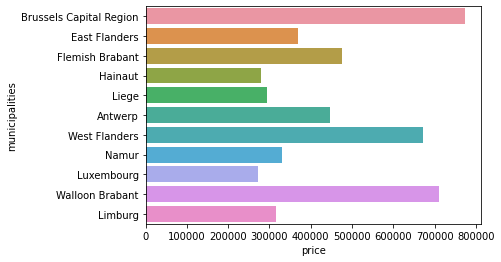

In [149]:
sns.barplot(data=immo_classic,y="municipalities",x="price",ci=False)
plt.savefig("plots/histpricemean.jpg",dpi=200,bbox_inches='tight')

In [150]:
corr_matrix_classic.sort_values(by="prix mètres carrés",ascending=False)

,price,constructionYear,room_number,mètres carrés,prix mètres carrés,parking extérieur,atticExists,basementExists,hasSwimmingPool,parking intérieur,lng,lat
prix mètres carrés,0.136365,0.034520,0.010003,-0.235607,1.000000,-0.013016,0.040970,-0.068898,-0.014027,0.006156,-0.120786,0.101352
price,1.000000,-0.021063,0.427545,0.559393,0.136365,0.161731,0.051706,0.153669,0.316435,0.057682,-0.145779,0.205192
lat,0.205192,0.175499,-0.116339,-0.100877,0.101352,-0.099996,-0.131187,-0.208142,-0.015091,-0.017969,-0.661537,1.000000
atticExists,0.051706,-0.195632,0.213436,0.179593,0.040970,0.073303,1.000000,0.134297,0.124603,0.012336,0.099027,-0.131187
constructionYear,-0.021063,1.000000,-0.229898,-0.233469,0.034520,-0.021619,-0.195632,-0.292470,-0.047274,0.004410,-0.108277,0.175499
room_number,0.427545,-0.229898,1.000000,0.622342,0.010003,0.226659,0.213436,0.184130,0.209628,0.105227,0.094404,-0.116339
parking intérieur,0.057682,0.004410,0.105227,0.078439,0.006156,0.079179,0.012336,0.039276,0.028682,1.000000,0.022904,-0.017969
parking extérieur,0.161731,-0.021619,0.226659,0.243275,-0.013016,1.000000,0.073303,0.072562,0.161496,0.079179,0.102527,-0.099996
hasSwimmingPool,0.316435,-0.047274,0.209628,0.326488,-0.014027,0.161496,0.124603,0.091394,1.000000,0.028682,0.025347,-0.015091
basementExists,0.153669,-0.292470,0.184130,0.215591,-0.068898,0.072562,0.134297,1.000000,0.091394,0.039276,0.187413,-0.208142


# MISC

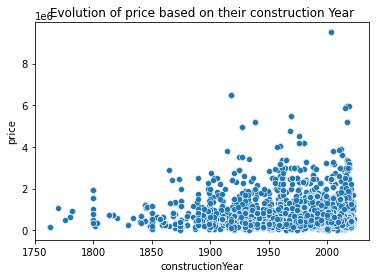

In [151]:
sns.scatterplot(data=immo_classic,x="constructionYear",y="price")
plt.title('Evolution of price based on their construction Year')
plt.savefig("plots/evoplotprice.jpg",dpi=200,bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='price', ylabel='subtype'>

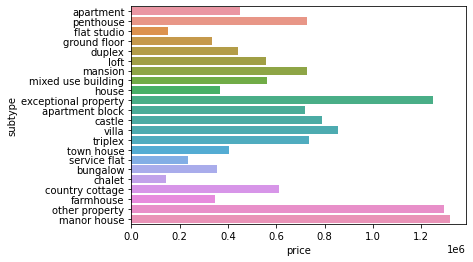

In [152]:
sns.barplot(x=immo_classic["price"],y=immo_classic["subtype"],ci=False)

<AxesSubplot:xlabel='constructionYear'>

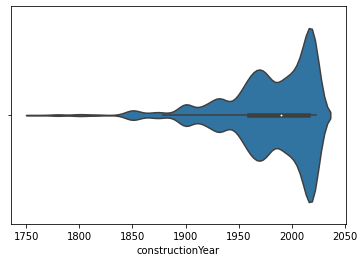

In [153]:
sns.violinplot(x=immo_classic["constructionYear"])

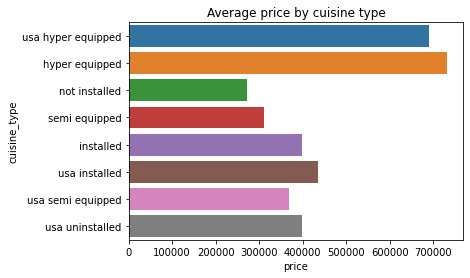

In [154]:
sns.barplot(x=immo_classic["price"],y=immo_classic["cuisine_type"],ci=False)
plt.title('Average price by cuisine type')
plt.savefig("plots/price_cuisine_type.jpg",dpi=200,bbox_inches='tight')
plt.show()

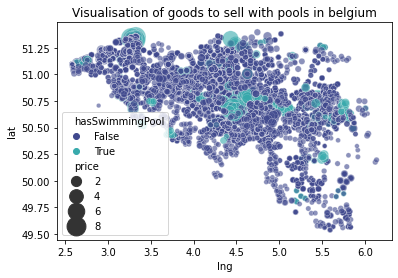

In [155]:
sns.scatterplot(data=immo_one_hot,x="lng",y="lat",size="price",sizes=(20,420),hue="hasSwimmingPool",alpha=0.6,legend="brief",palette="mako")
plt.title('Visualisation of goods to sell with pools in belgium')
plt.savefig("plots/poolplot1.jpg",dpi=200)
plt.show()

In [156]:
immo_classic.columns

Index(['price', 'type', 'subtype', 'constructionYear', 'condition',
       'room_number', 'cuisine_type', 'heatingType', 'mètres carrés',
       'prix mètres carrés', 'parking extérieur', 'atticExists',
       'basementExists', 'hasSwimmingPool', 'zip', 'city', 'municipalities',
       'parking intérieur', 'lng', 'lat', 'id', 'company_name'],
      dtype='object')

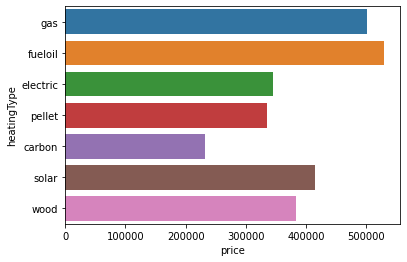

In [157]:
sns.barplot(data=immo_classic,x="price",y="heatingType",ci=False)
plt.show()

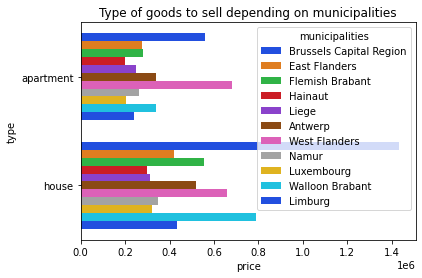

In [158]:
sns.barplot(data=immo_classic,x="price",y="type",hue="municipalities",ci=False,palette="bright")
plt.title("Type of goods to sell depending on municipalities")
plt.savefig("plots/type_good_munip.jpg",dpi=200,bbox_inches='tight')
plt.show()